## Myself

<img src="../data/books_dataset/images/lkdin.jpeg" width="140" height="140" border-radius="50%" align="left"/>

        Avinash Mishra (Avi) | Data Scientist | Catalina marketing Japan

        Linkedin : https://www.linkedin.com/in/avinash-mishra-a0846360/
  
        Github : https://github.com/avinash-mishra

        Catalina Japan : https://catalina-jp.com/

## Outline
 - Brief Introduction of recSys
 - Dataset
 - Build Models using neural approaches
 - Embedding visualization
 - Book recommendation

## Introduction

Recommendataion Engines are one of the most popular applications of Machine learning systems. Due to their widespread success, they are quickly becoming ubiquitous to a lot of business units. 

Types of Recommendation Systems:
- Popularity based
- Content based
- Collaborative filtering
	- Nearest Neighbor
	- Matrix Factorization

Above methods are quite common to build recommendation systems. 

In the past couple of years this trend has been changing. Due to the massive success of effectively training deep neural networks, new approaches have been developed by levaraging the tools and modeling flexibility from the Deep Learning ecosystem. 

This notebook gives a quickstart concepts using neural network architectures. 

## Building book Recommendation
Goal : <font color=blue>predict the rating or preference a user would give to a book given his old books ratings or preferences. </font>

### Dataset : [goodbooks-10k](http://fastml.com/goodbooks-10k-a-new-dataset-for-book-recommendations/)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

# Keras
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout, multiply, concatenate
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import model_to_dot


from sklearn.model_selection import train_test_split
from IPython.display import SVG

warnings.filterwarnings('ignore')
%matplotlib inline


Using TensorFlow backend.


## Loading data

In [2]:
ratings_df = pd.read_csv('../data/books_dataset/ratings.csv')


## EDA

In [3]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [4]:
ratings_df.shape

(981756, 3)

In [5]:
ratings_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
book_id,981756.0,4943.275636,2873.207415,1.0,2457.0,4921.0,7414.0,10000.0
user_id,981756.0,25616.759933,15228.338826,1.0,12372.0,25077.0,38572.0,53424.0
rating,981756.0,3.856534,0.983941,1.0,3.0,4.0,5.0,5.0


In [6]:
# 5 ratings
ratings_df.rating.unique()

array([5, 3, 4, 1, 2])

In [7]:
# total user
n_users = ratings_df.user_id.nunique()
n_users

53424

In [8]:
# Total books
n_books = ratings_df.book_id.nunique()
n_books

10000

## Create train & test set

In [9]:
train, test = train_test_split(ratings_df, test_size=0.2, random_state=42)

In [10]:
display(train.head())
display(test.head())

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5


,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3


## Model building

### Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.


#### Keras functional api working
> Create layers

> Combine everything inside model

> Compile model

> fit the model

#### Keras Dot product api is like this
`Dot(name="Dot-Product", axes=1)([book_vec, user_vec])`

In [11]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, output_dim=5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, output_dim=5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Instructions for updating:
Colocations handled automatically by placer.


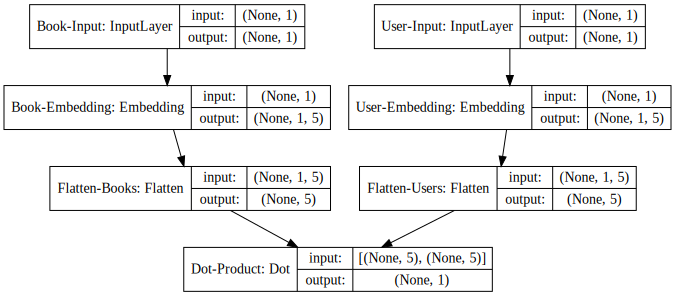

In [12]:
# Model visualization
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [ ]:
# model.summary()

In [13]:
def train_and_save(model, model_name):
    epoch = 5
    if os.path.exists(f'../models/{model_name}'):
        model = load_model(f'../models/{model_name}')
    else:
        history = model.fit([train.user_id, train.book_id], train.rating, epochs=epoch, verbose=1)
        model.save(f'../models/{model_name}')
        plt.plot(history.history['loss'])
        plt.xlabel("Epochs")
        plt.ylabel("Training Error")
    return model

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
785404/785404 [==============================] - 51s 64us/step - loss: 13.2797 - mean_absolute_error: 3.44560s - loss: 13.
Epoch 2/5
785404/785404 [==============================] - 53s 67us/step - loss: 3.8299 - mean_absolute_error: 1.5043 0s - loss: 3.8328 - mean_absolute_error: 1.5
Epoch 3/5
785404/785404 [==============================] - 48s 62us/step - loss: 1.6356 - mean_absolute_error: 0.9352
Epoch 4/5
785404/785404 [==============================] - 48s 62us/step - loss: 1.1507 - mean_absolute_error: 0.7962
Epoch 5/5
785404/785404 [==============================] - 49s 63us/step - loss: 0.9517 - mean_absolute_error: 0.7326


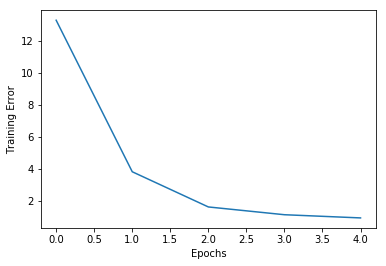

In [14]:
model = train_and_save(model, 'dot_product.h5')

In [15]:
# Evaluate model
display(['mse, mae'])
display(model.evaluate([test.user_id, test.book_id], test.rating))


# make prediction
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

print('predicted', 'actual')
[print(predictions[i], test.rating.iloc[i]) for i in range(0, 10)]


['mse, mae']

196352/196352 [==============================] - 2s 9us/step


[1.1218068912295038, 0.7770441920245176]

predicted actual
[5.317064] 5
[4.15283] 4
[3.7400064] 3
[4.1460543] 5
[3.3015592] 3
[3.6210608] 3
[4.144544] 3
[4.9545507] 4
[3.8728712] 3
[4.1982117] 5


[None, None, None, None, None, None, None, None, None, None]

## Creating Neural Network

Neural Networks proved their effectiveness for almost every machine learning problems with enough data. Neurals Networks perform exceptionally well for recommendation systems. 

### Model 1 
Use Embedding multiplication and Fully connected Dense NN layer. So that model can learn complex non-linear relationship.

<img src="../data/books_dataset/images/model1.png" alt="Model 1" style="width: 500px;" />

In [16]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, output_dim=5, name="Book-Embedding")(book_input)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, output_dim=5, name="User-Embedding")(user_input)

# Combine features
o = multiply([book_embedding, user_embedding])
o = Dropout(0.5)(o)
o = Flatten(name="Flatten-Embeddings")(o)

# add fully-connected-layers
out = Dense(1)(o)

# Create model and compile it
model1 = Model([user_input, book_input], out)
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


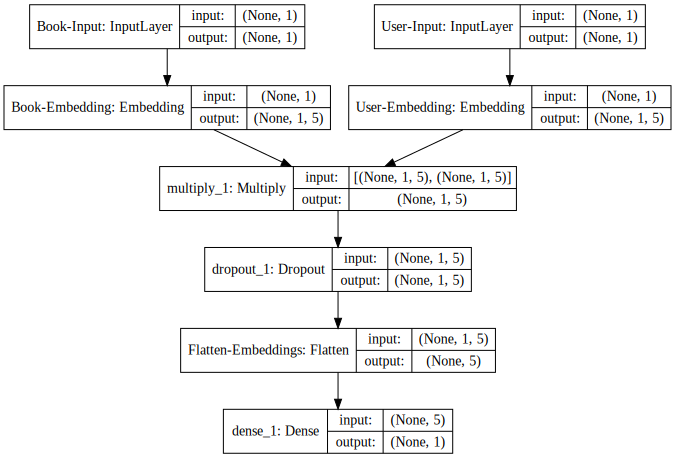

In [17]:
# Model visualization
SVG(model_to_dot(model1, show_shapes=True).create(prog='dot', format='svg'))

Epoch 1/5
785404/785404 [==============================] - 53s 67us/step - loss: 1.8725 - mean_absolute_error: 1.0312
Epoch 2/5
785404/785404 [==============================] - 52s 66us/step - loss: 0.9227 - mean_absolute_error: 0.7654
Epoch 3/5
785404/785404 [==============================] - 53s 68us/step - loss: 0.8629 - mean_absolute_error: 0.7350
Epoch 4/5
785404/785404 [==============================] - 62s 79us/step - loss: 0.8246 - mean_absolute_error: 0.7143
Epoch 5/5
785404/785404 [==============================] - 54s 69us/step - loss: 0.7979 - mean_absolute_error: 0.6999


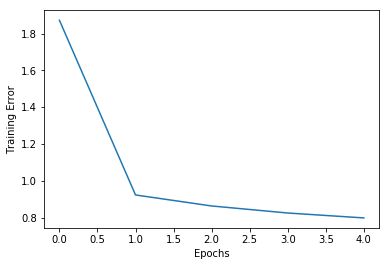

In [18]:
model1 = train_and_save(model1, 'model1.h5')

In [20]:
# Evaluate model
display(['mse, mae'])
display("Dot_product")
display(model.evaluate([test.user_id, test.book_id], test.rating))
print('model 1')
display(model1.evaluate([test.user_id, test.book_id], test.rating))


# make prediction
predictions = model1.predict([test.user_id.head(10), test.book_id.head(10)])
print('predicted', 'actual')
[print(predictions[i], test.rating.iloc[i]) for i in range(0, 10)]


['mse, mae']

'Dot_product'

196352/196352 [==============================] - 2s 10us/step


[1.1218068912295038, 0.7770441920245176]

model 1
196352/196352 [==============================] - 2s 10us/step


[0.8386083249551531, 0.7261866005052566]

predicted actual
[4.455324] 5
[3.721556] 4
[4.010911] 3
[3.9443326] 5
[3.4590263] 3
[4.0319667] 3
[3.5645003] 3
[3.980524] 4
[4.025294] 3
[3.9859614] 5


[None, None, None, None, None, None, None, None, None, None]

### Model 2 
Add bias that a user might have in giving consistently high scores to every book he read or a book having consistently bad scores for all users.

<img src="../data/books_dataset/images/model2.png" alt="Model 2" style="width: 500px;" />

In [21]:
bias = 1

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, output_dim=5, name="Book-Embedding")(book_input)
book_bias = Embedding(n_books+1, bias, name="Book-Bias-Embedding")(book_input)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, output_dim=5, name="User-Embedding")(user_input)
user_bias = Embedding(n_users+1, bias, name="User-Bias-Embedding")(user_input)

# Combine features
o = multiply([book_embedding, user_embedding])
o = concatenate([o, book_bias, user_bias])
o = Dropout(0.5)(o)
o = Flatten(name="Flatten-Features")(o)

# add fully-connected-layers
out = Dense(1)(o)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

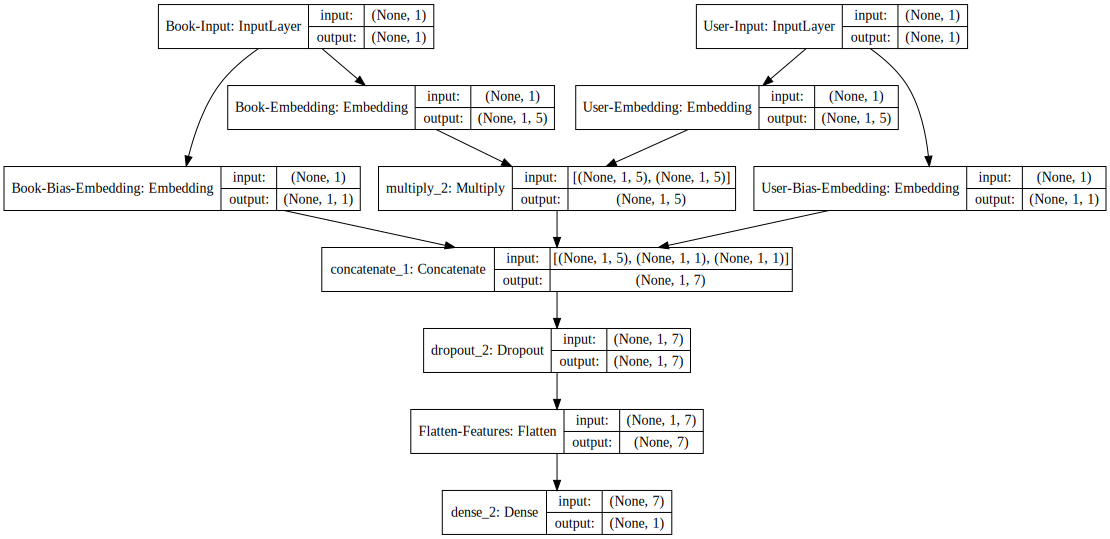

In [22]:
# Model visualization
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

Epoch 1/5
785404/785404 [==============================] - 63s 80us/step - loss: 1.7681 - mean_absolute_error: 0.9955
Epoch 2/5
785404/785404 [==============================] - 61s 78us/step - loss: 0.8329 - mean_absolute_error: 0.7240
Epoch 3/5
785404/785404 [==============================] - 61s 78us/step - loss: 0.7897 - mean_absolute_error: 0.6989
Epoch 4/5
785404/785404 [==============================] - 62s 79us/step - loss: 0.7607 - mean_absolute_error: 0.6829
Epoch 5/5
785404/785404 [==============================] - 62s 79us/step - loss: 0.7423 - mean_absolute_error: 0.6722


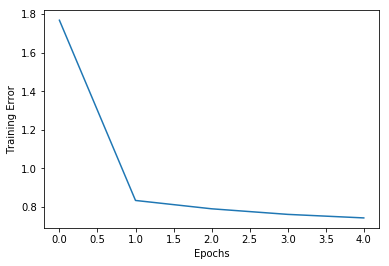

In [23]:
model2 = train_and_save(model2, 'model2.h5')

In [24]:
# Evaluate model
display(['mse, mae'])
display("Dot_product")
display(model.evaluate([test.user_id, test.book_id], test.rating))
print('model 1')
display(model1.evaluate([test.user_id, test.book_id], test.rating))
print('model 2')
display(model2.evaluate([test.user_id, test.book_id], test.rating))


# make prediction
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])
print('predicted', 'actual')
[print(predictions[i], test.rating.iloc[i]) for i in range(0, 10)]

['mse, mae']

'Dot_product'

196352/196352 [==============================] - 2s 10us/step


[1.1218068912295038, 0.7770441920245176]

model 1
196352/196352 [==============================] - 2s 10us/step


[0.8386083249551531, 0.7261866005052566]

model 2
196352/196352 [==============================] - 2s 11us/step


[0.773098948252578, 0.6960891861968821]

predicted actual
[4.510354] 5
[3.7819052] 4
[3.357685] 3
[4.0284576] 5
[3.5222375] 3
[3.9120607] 3
[3.7803028] 3
[4.3521137] 4
[4.1111712] 3
[4.184941] 5


[None, None, None, None, None, None, None, None, None, None]

### Model 3 
Add `relu` activation function. The nicest thing about relu is that it’s gradient is always equal to 1, this way we can pass the maximum amount of the error through the network during back-propagation.

<img src="../data/books_dataset/images/model3.png" alt="Model 3" style="width: 500px;" />

In [25]:
bias = 1

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, output_dim=5, name="Book-Embedding")(book_input)
book_bias = Embedding(n_books+1, bias, name="Book-Bias-Embedding")(book_input)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, output_dim=5, name="User-Embedding")(user_input)
user_bias = Embedding(n_users+1, bias, name="User-Bias-Embedding")(user_input)

# Combine features
o = multiply([book_embedding, user_embedding])
o = concatenate([o, book_bias, user_bias])
o = Dropout(0.5)(o)
o = Flatten(name="Flatten-Features")(o)

# add fully-connected-layers
o = Dense(10, activation='relu')(o)
out = Dense(1, activation='relu')(o)

# Create model and compile it
model3 = Model([user_input, book_input], out)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

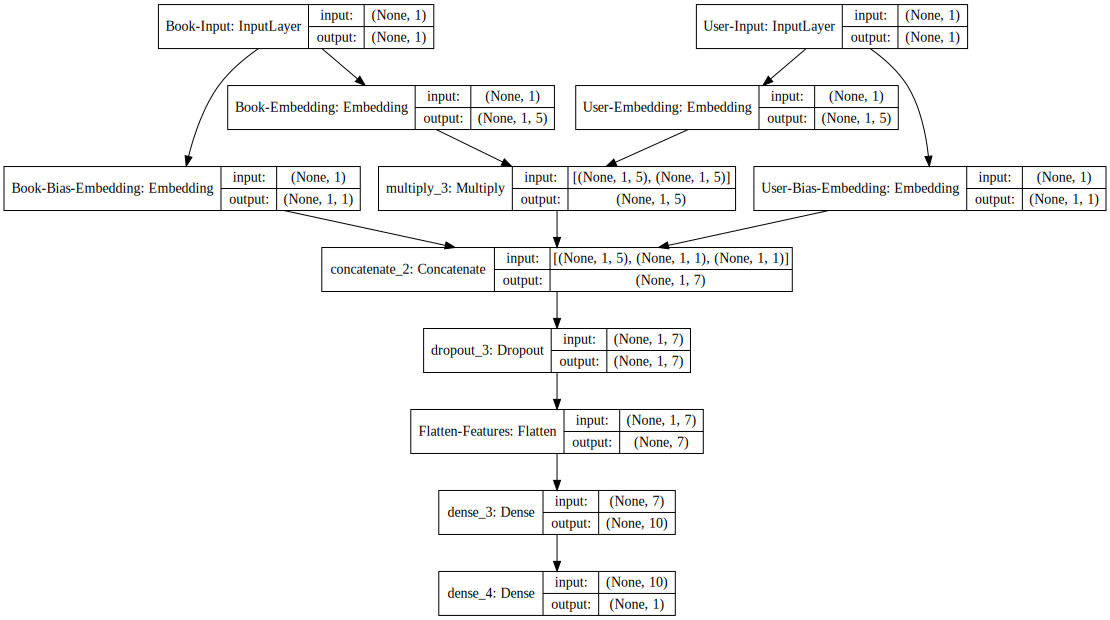

In [26]:
# Model visualization
SVG(model_to_dot(model3, show_shapes=True).create(prog='dot', format='svg'))

Epoch 1/5
785404/785404 [==============================] - 66s 84us/step - loss: 1.0297 - mean_absolute_error: 0.7859
Epoch 2/5
785404/785404 [==============================] - 63s 80us/step - loss: 0.8266 - mean_absolute_error: 0.7154
Epoch 3/5
785404/785404 [==============================] - 63s 80us/step - loss: 0.7866 - mean_absolute_error: 0.6921
Epoch 4/5
785404/785404 [==============================] - 63s 80us/step - loss: 0.7594 - mean_absolute_error: 0.6770
Epoch 5/5
785404/785404 [==============================] - 63s 81us/step - loss: 0.7408 - mean_absolute_error: 0.6659


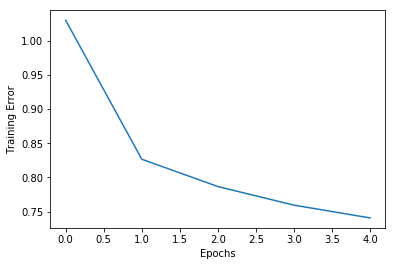

In [27]:
model3 = train_and_save(model3, 'model3.h5')

In [28]:
# Evaluate model
display(['mse, mae'])
display("Dot_product")
display(model.evaluate([test.user_id, test.book_id], test.rating))
print('model 1')
display(model1.evaluate([test.user_id, test.book_id], test.rating))
print('model 2')
display(model2.evaluate([test.user_id, test.book_id], test.rating))

print('model 3')
display(model3.evaluate([test.user_id, test.book_id], test.rating))


# make prediction
predictions = model3.predict([test.user_id.head(10), test.book_id.head(10)])
print('predicted', 'actual')
[print(predictions[i], test.rating.iloc[i]) for i in range(0, 10)]

['mse, mae']

'Dot_product'

196352/196352 [==============================] - 2s 12us/step


[1.1218068912295038, 0.7770441920245176]

model 1
196352/196352 [==============================] - 2s 11us/step


[0.8386083249551531, 0.7261866005052566]

model 2
196352/196352 [==============================] - 2s 11us/step


[0.773098948252578, 0.6960891861968821]

model 3
196352/196352 [==============================] - 3s 13us/step


[0.7634245301396471, 0.6825098093973068]

predicted actual
[4.4398975] 5
[3.98724] 4
[3.7663424] 3
[4.025962] 5
[3.774051] 3
[4.210328] 3
[3.726186] 3
[4.3456645] 4
[4.124619] 3
[4.1173205] 5


[None, None, None, None, None, None, None, None, None, None]

### Model 4 
Increase Dense layers to check if model improves.

In [29]:
bias = 1

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, output_dim=5, name="Book-Embedding")(book_input)
book_bias = Embedding(n_books+1, bias, name="Book-Bias-Embedding")(book_input)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, output_dim=5, name="User-Embedding")(user_input)
user_bias = Embedding(n_users+1, bias, name="User-Bias-Embedding")(user_input)

# Combine features
o = multiply([book_embedding, user_embedding])
o = concatenate([o, book_bias, user_bias])
o = Dropout(0.5)(o)
o = Flatten(name="Flatten-Features")(o)

# add fully-connected-layers
o = Dense(128, activation='relu')(o)
o = Dropout(0.2)(o)
o = Dense(32, activation='relu')(o)
o = Dropout(0.2)(o)
out = Dense(1, activation='relu')(o)

# Create model and compile it
model4 = Model([user_input, book_input], out)
model4.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

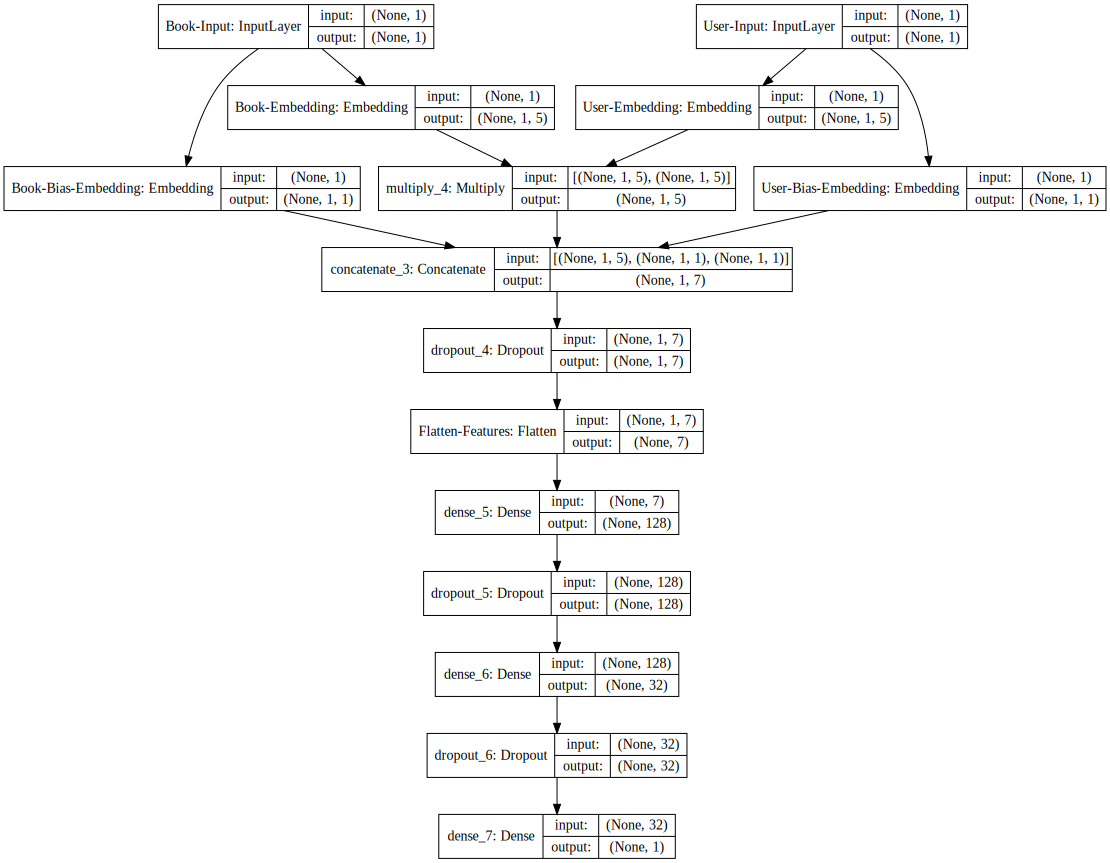

In [30]:
# Model visualization
SVG(model_to_dot(model4, show_shapes=True).create(prog='dot', format='svg'))

Epoch 1/5
785404/785404 [==============================] - 73s 93us/step - loss: 1.0068 - mean_absolute_error: 0.7997
Epoch 2/5
785404/785404 [==============================] - 74s 95us/step - loss: 0.8379 - mean_absolute_error: 0.7239
Epoch 3/5
785404/785404 [==============================] - 71s 91us/step - loss: 0.7875 - mean_absolute_error: 0.6995
Epoch 4/5
785404/785404 [==============================] - 73s 93us/step - loss: 0.7568 - mean_absolute_error: 0.6815
Epoch 5/5
785404/785404 [==============================] - 73s 93us/step - loss: 0.7350 - mean_absolute_error: 0.6689


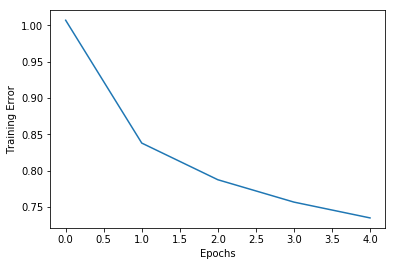

In [31]:
model4 = train_and_save(model4, 'model4.h5')

In [32]:
# Evaluate model
display(['mse, mae'])
display("Dot_product")
display(model.evaluate([test.user_id, test.book_id], test.rating))
print('model 1')
display(model1.evaluate([test.user_id, test.book_id], test.rating))
print('model 2')
display(model2.evaluate([test.user_id, test.book_id], test.rating))
print('model 3')
display(model3.evaluate([test.user_id, test.book_id], test.rating))

display('model 4')
display(model4.evaluate([test.user_id, test.book_id], test.rating))


# make prediction
predictions = model4.predict([test.user_id.head(10), test.book_id.head(10)])
print('predicted', 'actual')
[print(predictions[i], test.rating.iloc[i]) for i in range(0, 10)]

['mse, mae']

'Dot_product'

196352/196352 [==============================] - 2s 11us/step


[1.1218068912295038, 0.7770441920245176]

model 1
196352/196352 [==============================] - 2s 11us/step


[0.8386083249551531, 0.7261866005052566]

model 2
196352/196352 [==============================] - 2s 12us/step


[0.773098948252578, 0.6960891861968821]

model 3
196352/196352 [==============================] - 3s 13us/step


[0.7634245301396471, 0.6825098093973068]

'model 4'

196352/196352 [==============================] - 3s 16us/step


[0.7515956426143763, 0.6818110979462074]

predicted actual
[4.6202974] 5
[3.8527005] 4
[3.5620632] 3
[4.2047024] 5
[3.5519028] 3
[4.0241213] 3
[3.707457] 3
[4.5370827] 4
[4.2204423] 3
[4.0417385] 5


[None, None, None, None, None, None, None, None, None, None]

### Using extra information 
Often, along with the user-interaction data, other information such as user metadata and item metadata is also given. With the above networks, it's trivial to add this metadata to our model. Let's see how.

model = Model([user_input, book_input, age_input, book_contextual_input], out)


### Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variables like books and user in our case and therefore we can not only use them to get good results on our recommendation problem but also to extract inside about our data. 

__[Tensorflow embedding projector](http://projector.tensorflow.org/)__

In [33]:
# Extract embeddings
book_em = model4.get_layer('Book-Embedding')   # Book-Embedding is same name that we provided to Embedding layer
book_em_weights = book_em.get_weights()[0]

In [34]:
book_em_weights[:5]

array([[-0.00117069,  0.03524328,  0.01401868, -0.01382911, -0.02225442],
       [ 0.09990386, -0.010031  , -0.51286304, -0.7864025 , -0.15627657],
       [-0.00663378, -0.04430636, -0.60219824,  0.31686187, -0.04221382],
       [ 0.1284795 , -0.38519636,  0.01454445,  0.21171196, -0.5563464 ],
       [-0.8227816 , -0.04688111, -0.21962403, -0.5060309 ,  0.05366889]],
      dtype=float32)

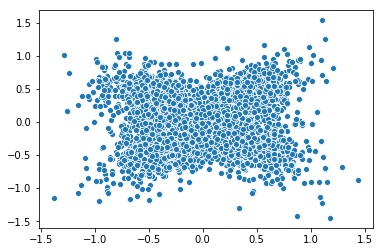

In [35]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)   # We used output_dim=5 so 1 < n_components <=5 
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:,1])

### Making recommendations

In [36]:
# Creating dataset for making recommendations for the first user
book_data = ratings_df.book_id.unique()
book_data[:5]

array([1, 2, 3, 4, 5])

In [37]:
np.sort(ratings_df.user_id.unique())

array([    1,     2,     3, ..., 53422, 53423, 53424])

In [38]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [39]:
predictions = model4.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]  # sort values in decreasing order and return index

recommended_book_ids

array([7946, 8945, 7253, 5206, 6589])

In [40]:
# print predicted scores
predictions[recommended_book_ids]

array([4.5959406, 4.519026 , 4.503858 , 4.4934273, 4.454032 ],
      dtype=float32)

In [41]:
books = pd.read_csv('../data/books_dataset/books.csv')
books.iloc[:, :10].head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby


In [42]:
books[books['id'].isin(recommended_book_ids)].iloc[:, :10]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title
5205,5206,13066,13066,2257006,31,446695688,9.780447e+12,Carl Hiaasen,2000.0,Sick Puppy
6588,6589,41710,41710,3132229,66,425197387,9.780425e+12,Clive Cussler,1974.0,Iceberg
7252,7253,22875,22875,409548,34,345418476,9.780345e+12,Stephen R. Donaldson,1982.0,The One Tree
7945,7946,39926,39926,836516,43,60512180,9.780061e+12,Naomi Wolf,1990.0,The Beauty Myth: How Images of Beauty Are Used...
8944,8945,32529,32529,3214115,40,752848267,9.780753e+12,Lisa Gardner,2001.0,The Next Accident


### Youtube recommendation Engine
[Paper link](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45530.pdf)

<img src="../data/books_dataset/images/YouTube.png" alt="YouTube RecSys" style="width: 600px;" />

### Summary

1. RecSys is a good use case in Data Science domain.
2. Dot product is easy to build and first step for Neural network.
3. Built 4 Models:
	- Model 1 : Multiply(user_vec, book_vec) + Dense NN layer
	- Model 2 : Added bias inside concatenation layer concatenate([o, book_bias, user_bias])
	- Model 3 : Added 'relu' Activation function inside Dense NN layer. 
	- Model 4 : Added more Dense layers to check if perfomance optimizes. 
4. Embedding visualization
5. Book recommendation

### Credit where it's due
 - A brilliant [fast.ai](https://course.fast.ai/videos/?lesson=4) course by Jeremy and Rachel. Refer to Lesson 4 for Collaborative Filtering lecture.
 - Deep learning class. [link](https://m2dsupsdlclass.github.io/lectures-labs/)
 - Reference: Keras Model guide. [link](http://faroit.com/keras-docs/1.0.4/getting-started/sequential-model-guide/)

### For those who'd like to get deeper
 - Deep Recommender models using PyTorch - [Spotlight](https://github.com/maciejkula/spotlight). The [Keras implementation](https://github.com/maciejkula/triplet_recommendations_keras).
 - [YouTube Recommendation Engine](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/45530.pdf) (Combination of techniques)
 - [RecSys conference 2017 talks](https://towardsdatascience.com/recsys-2017-2d0879351097)


<img src="https://media.tenor.com/images/69d1d66198f1aac60ad244f6c004f372/tenor.gif" alt="Thank You" style="width: 200px;"/>